In [2]:
#!pip install pandas
!pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.3 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pip
    Found existing installation: pip 22.2.1
    Uninstalling pip-22.2.1:
      Successfully uninstalled pip-22.2.1


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Lire un fichier JSON en DataFrame
file_path = "/home/aterrien_wsl/code/TerrienAudrey/migration_bdd/"
df = pd.read_json(f"{file_path}organizations.json")

# Afficher les premières lignes
df.head()

,or_id,or_denomination,or_rna,or_house_number,or_street,or_postal_code,or_city,or_country,or_state,or_logo,...,fk_us,fk_ot,fk_ovs,fk_cou,fileFi_id,categories,logistic_address,origin_approvals,positioning,organization_categories
0,0,EMPTY,W000006243,,,,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
1,1,EMPTY,W000006243,,,,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
2,2,EMPTY,W000006243,,,,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
3,3,EMPTY,W000006243,,,,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
4,4,EMPTY,W000006243,,,,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]


In [3]:
df_no_empty = df[~(df.or_denomination == "EMPTY")]
df_no_empty.head()

,or_id,or_denomination,or_rna,or_house_number,or_street,or_postal_code,or_city,or_country,or_state,or_logo,...,fk_us,fk_ot,fk_ovs,fk_cou,fileFi_id,categories,logistic_address,origin_approvals,positioning,organization_categories
5,5,HORTIBAT,W592000792,,82 RUE FAIDHERBE 59360 LE CATEAU CAMBRÉSIS,59,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
6,6,AIDE MEDICALE ET CARITATIVE FRANCE / UKRAINE,W789308152,,ROUTE DE SAINT GERMAIN 78930 GUERVILLE,78,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
7,7,ASS DES AMIS DES COMPAGNONS D'EMMAUS 70 (COMMU...,W702000950,,5 RUE BRANLY 70000 VESOUL,70,VESOUL,,,NaN,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
8,8,LA CROIX ROUGE DE MAZINGARBE,W626706685,,9 RUE RAYMOND DUPUICH 62670 MAZINGARBE,62,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
9,9,ACTIONS CONTRE LA FAIM,W920003518,,,92,NANTERRE,,,NaN,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]


In [40]:
df_no_empty.describe()

,or_id,or_logo,or_id_address,fk_us,fk_ot,fk_ovs,fk_cou,fileFi_id
count,471.000000,0.0,471.000000,0.0,0.0,0.0,0.0,0.0
mean,241.000000,NaN,241.000000,NaN,NaN,NaN,NaN,NaN
std,136.110249,NaN,136.110249,NaN,NaN,NaN,NaN,NaN
min,6.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
25%,123.500000,NaN,123.500000,NaN,NaN,NaN,NaN,NaN
50%,241.000000,NaN,241.000000,NaN,NaN,NaN,NaN,NaN
75%,358.500000,NaN,358.500000,NaN,NaN,NaN,NaN,NaN
max,476.000000,NaN,476.000000,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe(exclude=[np.number])

,or_denomination,or_rna,or_house_number,or_street,or_postal_code,or_city,or_country,or_state,or_additionnal_information,or_creation_date,categories,logistic_address,origin_approvals,positioning,organization_categories
count,477,477,477,477,477,477,477,477,274,477,477,477,477,477,477
unique,174,172,10,190,70,46,1,1,8,1,1,1,1,1,1
top,HORTIBAT,W592000792,,82 RUE FAIDHERBE 59360 LE CATEAU CAMBRÉSIS,59,,,,FAKE RNA,2025-02-10T17:34:34.497939,[],[],[],[],[]
freq,78,78,466,69,142,411,477,477,153,477,477,477,477,477,477


In [4]:
import re

def extract_and_clean_street(df):
    df = df.copy()  # 🔹 Copie pour éviter le warning

    def extract_five_digit_number(text):
        if pd.isna(text):
            return None
        matches = re.findall(r'\b\d{5}\b', str(text))
        return matches[0] if matches else None

    def remove_five_digit_number(text, number):
        if pd.isna(text) or not number:
            return text
        return re.sub(r'\b' + number + r'\b', '', str(text)).strip()

    # 🔹 Utiliser .loc pour éviter le warning
    df.loc[:, 'or_postal_code_2'] = df['or_street'].apply(extract_five_digit_number)
    df.loc[:, 'or_street_2'] = df.apply(
        lambda row: remove_five_digit_number(row['or_street'], row['or_postal_code_2']),
        axis=1
    )

    return df

df = extract_and_clean_street(df)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   or_id                       477 non-null    int64  
 1   or_denomination             477 non-null    object 
 2   or_rna                      477 non-null    object 
 3   or_house_number             477 non-null    object 
 4   or_street                   477 non-null    object 
 5   or_postal_code              477 non-null    object 
 6   or_city                     477 non-null    object 
 7   or_country                  477 non-null    object 
 8   or_state                    477 non-null    object 
 9   or_logo                     0 non-null      float64
 10  or_additionnal_information  287 non-null    object 
 11  or_id_address               477 non-null    int64  
 12  or_creation_date            477 non-null    object 
 13  fk_us                       0 non-n

In [10]:
df['or_street_2'].head()

0    
1    
2    
3    
4    
Name: or_street_2, dtype: object

In [6]:
import pandas as pd
import re

def extract_and_clean_street(df):
    df = df.copy()  # 🔹 Copie pour éviter les modifications involontaires sur l'original

    # Fonction pour extraire un code postal et le reste du texte après
    def extract_postal_and_city(text):
        if pd.isna(text):
            return None, None

        matches = re.search(r'\b(\d{5})\b(.*)', str(text))  # Trouver le code postal et tout ce qui suit
        if matches:
            postal_code = matches.group(1)
            city = matches.group(2).strip()  # Supprimer les espaces inutiles
            return postal_code, city
        return None, None

    # Fonction pour supprimer le code postal et la ville
    def clean_street(text, postal_code, city):
        if pd.isna(text):
            return text
        cleaned_text = str(text)
        if postal_code:
            cleaned_text = re.sub(r'\b' + postal_code + r'\b', '', cleaned_text).strip()
        if city:
            cleaned_text = re.sub(re.escape(city), '', cleaned_text).strip()
        return cleaned_text

    # Appliquer l'extraction sur chaque ligne
    df[['or_postal_code_2', 'or_city_2']] = df['or_street'].apply(
        lambda x: pd.Series(extract_postal_and_city(x))
    )

    # Nettoyer or_street_2
    df['or_street_2'] = df.apply(
        lambda row: clean_street(row['or_street'], row['or_postal_code_2'], row['or_city_2']),
        axis=1
    )

    return df


In [7]:
df = extract_and_clean_street(df)
df[['or_street', 'or_postal_code_2', 'or_city_2', 'or_street_2' ]].head(2)

,or_street,or_postal_code_2,or_city_2,or_street_2
0,,None,None,
1,,None,None,


In [49]:
#!pip install missingno


Affichage simple des nulls :
or_street            0
or_postal_code_2    62
or_city_2           62
or_street_2          0
dtype: int64

Pourcentage de valeurs non-nulles :
or_street           100.000000
or_postal_code_2     87.002096
or_city_2            87.002096
or_street_2         100.000000
dtype: float64

Valeurs nulles dans les 2 premières lignes :
   or_street  or_postal_code_2  or_city_2  or_street_2
0      False              True       True        False
1      False              True       True        False


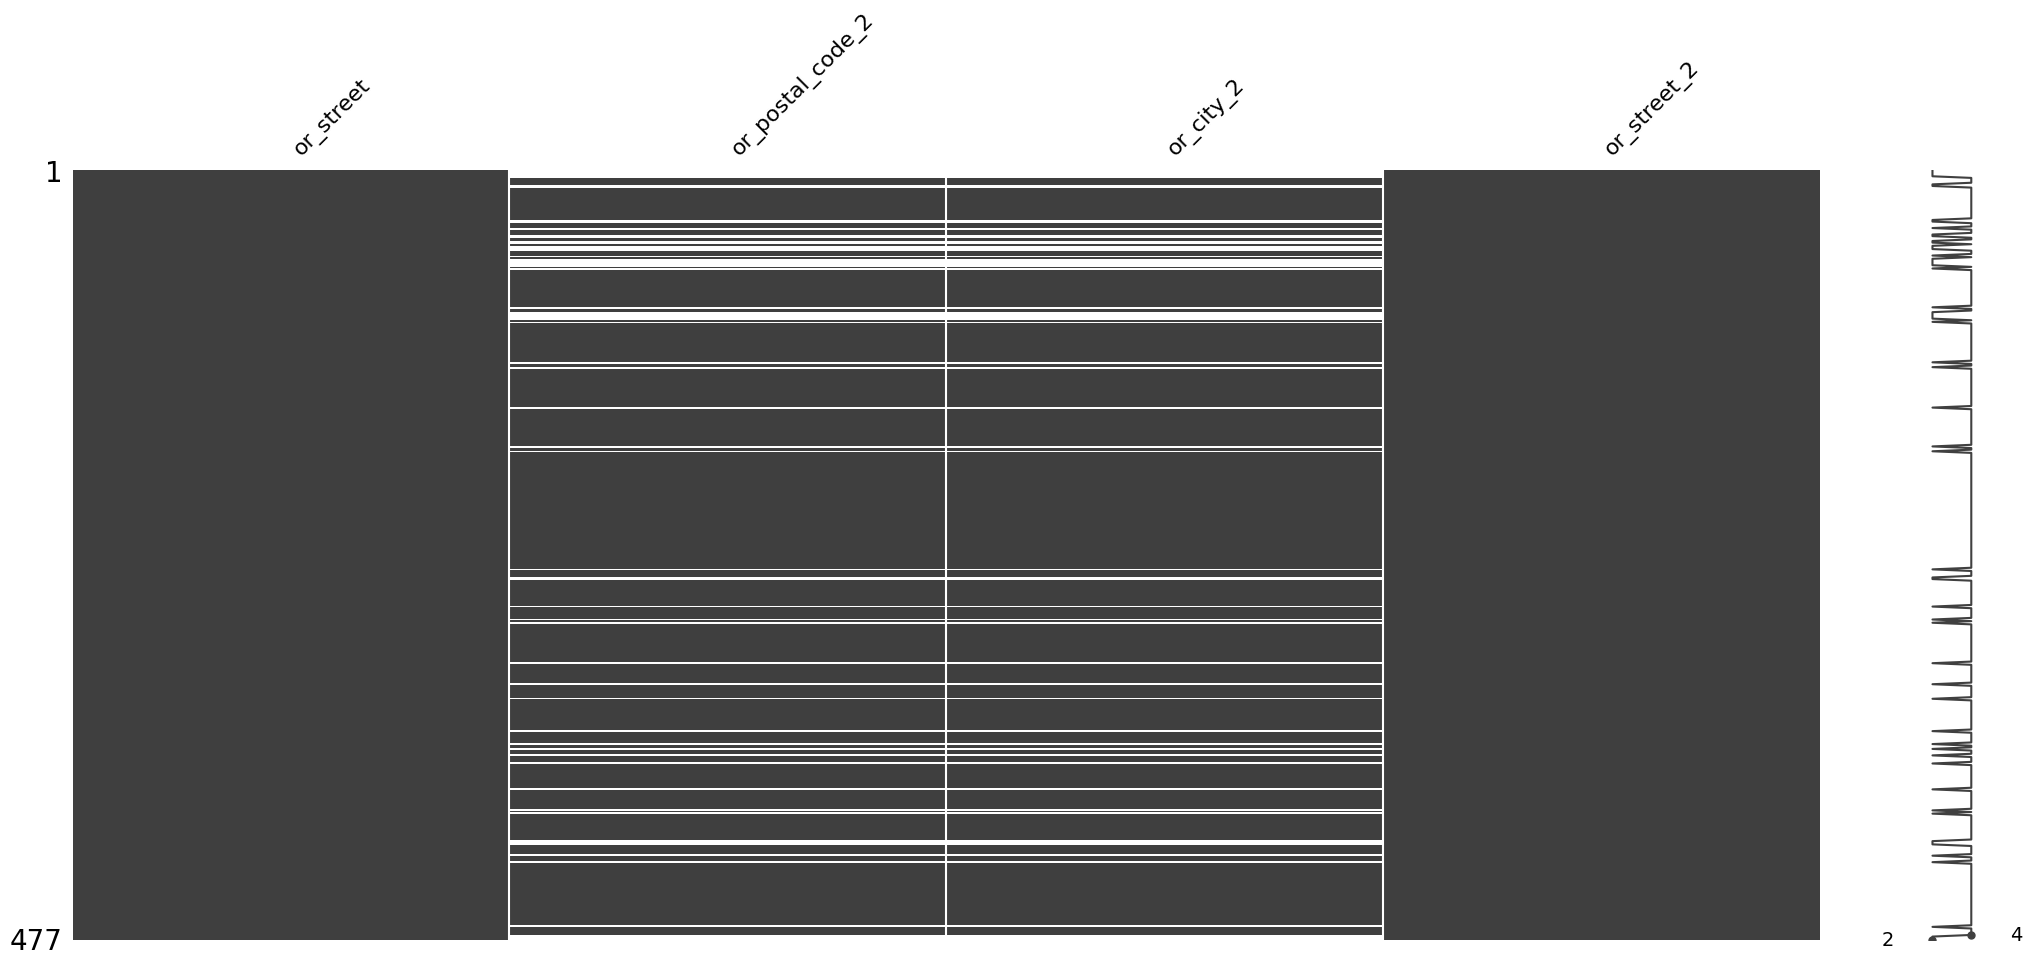

In [8]:
# 1. Méthode simple avec pandas
print("\nAffichage simple des nulls :")
print(df[['or_street', 'or_postal_code_2', 'or_city_2', 'or_street_2']].isnull().sum())

# 2. Visualisation avec missingno
import missingno as msno

# Création d'une matrice visuelle des valeurs manquantes
msno.matrix(df[['or_street', 'or_postal_code_2', 'or_city_2', 'or_street_2']])

# Pour voir aussi les pourcentages de complétion
print("\nPourcentage de valeurs non-nulles :")
print(df[['or_street', 'or_postal_code_2', 'or_city_2', 'or_street_2']].notna().mean() * 100)

# Pour voir les 2 premières lignes avec indication True/False des nulls
print("\nValeurs nulles dans les 2 premières lignes :")
print(df[['or_street', 'or_postal_code_2', 'or_city_2', 'or_street_2']].head(2).isnull())

In [22]:
# Sélectionner les lignes où au moins une des colonnes spécifiées contient une valeur nulle
df_nulls = df[df[['or_street', 'or_postal_code_2', 'or_city_2', 'or_street_2']].isnull().any(axis=1)]

# Afficher le DataFrame filtré
df_nulls.or_postal_code_2.value_counts()


Series([], Name: count, dtype: int64)

In [73]:
df_nulls.describe(exclude=np.number)

,or_denomination,or_rna,or_house_number,or_street,or_postal_code,or_city,or_country,or_state,or_additionnal_information,or_creation_date,categories,logistic_address,origin_approvals,positioning,organization_categories,or_postal_code_2,or_street_2,or_city_2
count,102,102,102,102,102,102,102,102,51,102,102,102,102,102,102,0,102,0
unique,43,43,2,30,22,4,1,1,4,1,1,1,1,1,1,0,30,0
top,HORTIBAT,W592000792,,82 RUE FAIDHERBE LE CATEAU CAMBRESIS,59,,,,FAKE RNA,2025-02-10T17:34:34.497939,[],[],[],[],[],NaN,82 RUE FAIDHERBE LE CATEAU CAMBRESIS,NaN
freq,53,53,101,43,54,99,102,102,35,102,102,102,102,102,102,NaN,43,NaN


In [9]:
df.sample(5)

,or_id,or_denomination,or_rna,or_house_number,or_street,or_postal_code,or_city,or_country,or_state,or_logo,...,fk_cou,fileFi_id,categories,logistic_address,origin_approvals,positioning,organization_categories,or_postal_code_2,or_street_2,or_city_2
409,409,RESTOS DU CŒUR DE RAISMES,W595900602,,"26 RUE DE LA GARE, 59590 RAISMES",59,,,,NaN,...,NaN,NaN,[],[],[],[],[],59590,"26 RUE DE LA GARE,",RAISMES
457,457,SPF Ajaccio,W200901466,,Résidence les amandiers 2 - Rue Col Biancamari...,20,Ajaccio,,,NaN,...,NaN,NaN,[],[],[],[],[],20090,Résidence les amandiers 2 - Rue Col Biancamaria,Ajaccio
106,106,EMMAUS AGEN,W470008723,,IMPASSE DE L'ABBE PIERRE 47000 AGEN,47,,,,NaN,...,NaN,NaN,[],[],[],[],[],47000,IMPASSE DE L'ABBE PIERRE,AGEN
257,257,ENVIE NORD,W628800480,,4 RUE DU FORT 77340 PONTAULT COMBAULT,77,,,,NaN,...,NaN,NaN,[],[],[],[],[],77340,4 RUE DU FORT,PONTAULT COMBAULT
266,266,ETIC 53,W531001546,,109 CHEMIN DU HALAGE 53100 MAYENNE,53,,,,NaN,...,NaN,NaN,[],[],[],[],[],53100,109 CHEMIN DU HALAGE,MAYENNE


In [10]:
df[df.or_denomination == "HORTIBAT"]

,or_id,or_denomination,or_rna,or_house_number,or_street,or_postal_code,or_city,or_country,or_state,or_logo,...,fk_cou,fileFi_id,categories,logistic_address,origin_approvals,positioning,organization_categories,or_postal_code_2,or_street_2,or_city_2
5,5,HORTIBAT,W592000792,,82 RUE FAIDHERBE 59360 LE CATEAU CAMBRÉSIS,59,,,,NaN,...,NaN,NaN,[],[],[],[],[],59360,82 RUE FAIDHERBE,LE CATEAU CAMBRÉSIS
281,281,HORTIBAT,W592000792,,82 RUE FAIDHERBE 59360 LE CATEAU CAMBRÉSIS,59,,,,NaN,...,NaN,NaN,[],[],[],[],[],59360,82 RUE FAIDHERBE,LE CATEAU CAMBRÉSIS
282,282,HORTIBAT,W592000792,,82 RUE FAIDHERBE 59360 LE CATEAU CAMBRÉSIS,59,LE CATEAU CAMBRÉSIS,,,NaN,...,NaN,NaN,[],[],[],[],[],59360,82 RUE FAIDHERBE,LE CATEAU CAMBRÉSIS
283,283,HORTIBAT,W592000792,,82 RUE FAIDHERBE 59360 LE CATEAU CAMBRÉSIS,59,,,,NaN,...,NaN,NaN,[],[],[],[],[],59360,82 RUE FAIDHERBE,LE CATEAU CAMBRÉSIS
284,284,HORTIBAT,W592000792,,82 RUE FAIDHERBE 59360 LE CATEAU CAMBRÉSIS,59,LE CATEAU CAMBRÉSIS,,,NaN,...,NaN,NaN,[],[],[],[],[],59360,82 RUE FAIDHERBE,LE CATEAU CAMBRÉSIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,353,HORTIBAT,W592000792,,82 RUE FAIDHERBE 59360 LE CATEAU CAMBRÉSIS,59,,,,NaN,...,NaN,NaN,[],[],[],[],[],59360,82 RUE FAIDHERBE,LE CATEAU CAMBRÉSIS
354,354,HORTIBAT,W592000792,,82 RUE FAIDHERBE 59360 LE CATEAU CAMBRÉSIS,,,,,NaN,...,NaN,NaN,[],[],[],[],[],59360,82 RUE FAIDHERBE,LE CATEAU CAMBRÉSIS
355,355,HORTIBAT,W592000792,1349,AVENUE PIERRE GRAND,84300 59,,,,NaN,...,NaN,NaN,[],[],[],[],[],None,AVENUE PIERRE GRAND,None
356,356,HORTIBAT,W592000792,,82 RUE FAIDHERBE 59360 LE CATEAU CAMBRÉSIS,59,Le cateau cambrésis,,,NaN,...,NaN,NaN,[],[],[],[],[],59360,82 RUE FAIDHERBE,LE CATEAU CAMBRÉSIS


In [11]:
import pandas as pd
import re

def extract_and_clean_street(df):
    df = df.copy()  # 🔹 Copie pour éviter les modifications involontaires sur l'original

    # Fonction pour extraire un code postal et le reste du texte après
    def extract_postal_and_city(text):
        if pd.isna(text):
            return None, None

        matches = re.search(r'\b(\d{5})\b(.*)', str(text))  # Trouver le code postal et tout ce qui suit
        if matches:
            postal_code = matches.group(1)
            city = matches.group(2).strip()  # Supprimer les espaces inutiles
            return postal_code, city
        return None, None

    # Fonction pour supprimer le code postal et la ville
    def clean_street(text, postal_code, city):
        if pd.isna(text):
            return text
        cleaned_text = str(text)
        if postal_code:
            cleaned_text = re.sub(r'\b' + postal_code + r'\b', '', cleaned_text).strip()
        if city:
            cleaned_text = re.sub(re.escape(city), '', cleaned_text).strip()
        return cleaned_text

    # Appliquer l'extraction sur chaque ligne
    df[['or_postal_code_2', 'or_city_2']] = df['or_street'].apply(
        lambda x: pd.Series(extract_postal_and_city(x))
    )

    # Nettoyer or_street_2
    df['or_street_2'] = df.apply(
        lambda row: clean_street(row['or_street'], row['or_postal_code_2'], row['or_city_2']),
        axis=1
    )

    return df


In [12]:
df = extract_and_clean_street(df)

In [22]:
df[df['or_city_2'].isna()]

,or_id,or_denomination,or_rna,or_house_number,or_street,or_postal_code,or_city,or_country,or_state,or_logo,...,fk_cou,fileFi_id,categories,logistic_address,origin_approvals,positioning,organization_categories,or_postal_code_2,or_street_2,or_city_2
0,0,EMPTY,W000006243,,,,,,,NaN,...,NaN,NaN,[],[],[],[],[],None,,None
1,1,EMPTY,W000006243,,,,,,,NaN,...,NaN,NaN,[],[],[],[],[],None,,None
2,2,EMPTY,W000006243,,,,,,,NaN,...,NaN,NaN,[],[],[],[],[],None,,None
3,3,EMPTY,W000006243,,,,,,,NaN,...,NaN,NaN,[],[],[],[],[],None,,None
4,4,EMPTY,W000006243,,,,,,,NaN,...,NaN,NaN,[],[],[],[],[],None,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,428,SECOURS POPULAIRE LEZENNES 59,W592602270,,,,,,,NaN,...,NaN,NaN,[],[],[],[],[],None,,None
468,468,Soli'Bât,W371002235,23,RUE DE SAPAILLE,37100,TOURS,,,NaN,...,NaN,NaN,[],[],[],[],[],None,RUE DE SAPAILLE,None
474,474,UNASS VAUCLUSE,W842003566,,,38,,,,NaN,...,NaN,NaN,[],[],[],[],[],None,,None
475,475,VALORIS,W321001721,14,RUE ROGER SALENGRO,32000,AUCH,,,NaN,...,NaN,NaN,[],[],[],[],[],None,RUE ROGER SALENGRO,None


il faut répéter pour les companies, organization et pour logistic addresses. il faut faire les adresses. ensuite écrire ce que j'ai fait et commencer à regarder dans le travail de Cédric. rajouter une amélioration au niveau des ansi. 

In [23]:
import re

def extract_and_clean_street(df):
    df = df.copy()  # 🔹 Copie pour éviter le warning

    def extract_five_digit_number(text):
        if pd.isna(text):
            return None
        matches = re.findall(r'\b\d{5}\b', str(text))
        return matches[0] if matches else None

    def remove_five_digit_number(text, number):
        if pd.isna(text) or not number:
            return text
        return re.sub(r'\b' + number + r'\b', '', str(text)).strip()

    # 🔹 Utiliser .loc pour éviter le warning
    df.loc[:, 'or_postal_code_2'] = df['or_street'].apply(extract_five_digit_number)
    df.loc[:, 'or_street_2'] = df.apply(
        lambda row: remove_five_digit_number(row['or_street'], row['or_postal_code_2']),
        axis=1
    )

    return df

df = extract_and_clean_street(df)

import pandas as pd
import re

def extract_and_clean_street(df):
    df = df.copy()  # 🔹 Copie pour éviter les modifications involontaires sur l'original

    # Fonction pour extraire un code postal et le reste du texte après
    def extract_postal_and_city(text):
        if pd.isna(text):
            return None, None

        matches = re.search(r'\b(\d{5})\b(.*)', str(text))  # Trouver le code postal et tout ce qui suit
        if matches:
            postal_code = matches.group(1)
            city = matches.group(2).strip()  # Supprimer les espaces inutiles
            return postal_code, city
        return None, None

    # Fonction pour supprimer le code postal et la ville
    def clean_street(text, postal_code, city):
        if pd.isna(text):
            return text
        cleaned_text = str(text)
        if postal_code:
            cleaned_text = re.sub(r'\b' + postal_code + r'\b', '', cleaned_text).strip()
        if city:
            cleaned_text = re.sub(re.escape(city), '', cleaned_text).strip()
        return cleaned_text

    # Appliquer l'extraction sur chaque ligne
    df[['or_postal_code_2', 'or_city_2']] = df['or_street'].apply(
        lambda x: pd.Series(extract_postal_and_city(x))
    )

    # Nettoyer or_street_2
    df['or_street_2'] = df.apply(
        lambda row: clean_street(row['or_street'], row['or_postal_code_2'], row['or_city_2']),
        axis=1
    )

    return df

import pandas as pd
import re

def is_valid_value(value):
    """Vérifie si une valeur est valide (non null et non vide)"""
    return pd.notna(value) and str(value).strip() != ""

def extract_and_clean_street(df):
    # Vérification des colonnes requises
    required_columns = ['or_street', 'or_city', 'or_postal_code', 'or_house_number']
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Colonnes manquantes : {missing_columns}")

    df = df.copy()  # Copie pour éviter les modifications involontaires

    # Fonction pour extraire un code postal et le reste du texte après
    def extract_postal_and_city(text):
        if pd.isna(text):
            return None, None

        matches = re.search(r'\b(\d{5})\b(.*)', str(text))
        if matches:
            postal_code = matches.group(1)
            city = matches.group(2).strip()
            return postal_code, city
        return None, None

    # Fonction pour extraire le numéro de rue
    def extract_house_number(text):
        if pd.isna(text):
            return None

        matches = re.match(r'^(\d+(?:[ -]?\w{0,5})?)\b', str(text))
        if matches:
            return matches.group(1)
        return None

    # Fonction pour nettoyer la rue
    def clean_street(text, postal_code, city, house_number):
        if pd.isna(text):
            return text
        cleaned_text = str(text)

        if house_number:
            cleaned_text = re.sub(r'^' + re.escape(str(house_number)) + r'\b', '', cleaned_text).strip()
        if postal_code:
            cleaned_text = re.sub(r'\b' + postal_code + r'\b', '', cleaned_text).strip()
        if city:
            cleaned_text = re.sub(re.escape(city), '', cleaned_text).strip()

        return cleaned_text

    # Extraction initiale depuis or_street
    df[['extracted_postal_code', 'extracted_city']] = df['or_street'].apply(
        lambda x: pd.Series(extract_postal_and_city(x))
    )
    df['extracted_house_number'] = df['or_street'].apply(extract_house_number)

    # Attribution des valeurs finales en respectant les priorités
    # Pour le code postal
    df['or_postal_code_2'] = df.apply(
        lambda row: row['or_postal_code'] if is_valid_value(row['or_postal_code'])
        else row['extracted_postal_code'],
        axis=1
    )

    # Pour la ville
    df['or_city_2'] = df.apply(
        lambda row: row['or_city'] if is_valid_value(row['or_city'])
        else row['extracted_city'],
        axis=1
    )

    # Pour le numéro de rue
    df['or_house_number_2'] = df.apply(
        lambda row: row['or_house_number'] if is_valid_value(row['or_house_number'])
        else row['extracted_house_number'],
        axis=1
    )

    # Nettoyage final de or_street_2
    df['or_street_2'] = df.apply(
        lambda row: clean_street(
            row['or_street'],
            row['or_postal_code_2'],
            row['or_city_2'],
            row['or_house_number_2']
        ),
        axis=1
    )

    # Suppression des colonnes temporaires
    df = df.drop(['extracted_postal_code', 'extracted_city', 'extracted_house_number'], axis=1)

    return df

In [24]:
df = extract_and_clean_street(df)
df[df['or_city_2'].isna()]['or_city_2'].value_counts()

,or_id,or_denomination,or_rna,or_house_number,or_street,or_postal_code,or_city,or_country,or_state,or_logo,...,fileFi_id,categories,logistic_address,origin_approvals,positioning,organization_categories,or_postal_code_2,or_street_2,or_city_2,or_house_number_2
0,0,EMPTY,W000006243,,,,,,,NaN,...,NaN,[],[],[],[],[],None,,None,None
1,1,EMPTY,W000006243,,,,,,,NaN,...,NaN,[],[],[],[],[],None,,None,None
2,2,EMPTY,W000006243,,,,,,,NaN,...,NaN,[],[],[],[],[],None,,None,None
3,3,EMPTY,W000006243,,,,,,,NaN,...,NaN,[],[],[],[],[],None,,None,None
4,4,EMPTY,W000006243,,,,,,,NaN,...,NaN,[],[],[],[],[],None,,None,None
31,31,ALEFPA VALENCIENNES,W590009586,,,59,,,,NaN,...,NaN,[],[],[],[],[],59,,None,None
32,32,ALPHA,W590009153,,4 CR SAINT-ROCH59280 ARMENTIÈRES,59,,,,NaN,...,NaN,[],[],[],[],[],59,SAINT-ROCH59280 ARMENTIÈRES,None,4 CR
36,36,APEI DENAIN,W000005158,,,,,,,NaN,...,NaN,[],[],[],[],[],None,,None,None
40,40,ASSOCIATION LA MAIN TENDUE,W590001632,,DOUAI,59,,,,NaN,...,NaN,[],[],[],[],[],59,DOUAI,None,None
41,41,ASSOCIATION PILOTINE/FRCPM,W620008627,,ATT VALIDATION DÉFINITIVE,62,,,,NaN,...,NaN,[],[],[],[],[],62,ATT VALIDATION DÉFINITIVE,None,None


In [25]:
# Lire un fichier JSON en DataFrame
file_path = "/home/aterrien_wsl/code/TerrienAudrey/migration_bdd/"
df = pd.read_json(f"{file_path}organizations.json")

# Afficher les premières lignes
df.head()

,or_id,or_denomination,or_rna,or_house_number,or_street,or_postal_code,or_city,or_country,or_state,or_logo,...,fk_us,fk_ot,fk_ovs,fk_cou,fileFi_id,categories,logistic_address,origin_approvals,positioning,organization_categories
0,0,EMPTY,W000006243,,,,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
1,1,EMPTY,W000006243,,,,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
2,2,EMPTY,W000006243,,,,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
3,3,EMPTY,W000006243,,,,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
4,4,EMPTY,W000006243,,,,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]


In [26]:
df = extract_and_clean_street(df)
df[df['or_city_2'].isna()]['or_city_2'].value_counts()

Series([], Name: count, dtype: int64)

In [27]:
df.sample(5)

,or_id,or_denomination,or_rna,or_house_number,or_street,or_postal_code,or_city,or_country,or_state,or_logo,...,fileFi_id,categories,logistic_address,origin_approvals,positioning,organization_categories,or_postal_code_2,or_city_2,or_house_number_2,or_street_2
372,372,LE CINGAL RESPIRE,W146806554,,5 route de Fontenay 14680 Bretteville sur Laize,14,Bretteville sur Laize,,,NaN,...,NaN,[],[],[],[],[],14,Bretteville sur Laize,5 route,de Fontenay 14680
131,131,COMM EMMAUS CHIFFO ABBE PIERRE,W592002762,,952 ROUTE NATIONALE 59400 FONTAINE-NOTRE-DAME,59,,,,NaN,...,NaN,[],[],[],[],[],59,FONTAINE-NOTRE-DAME,952 ROUTE,NATIONALE 59400
277,277,ASS DES AMIS DES COMPAGNONS D'EMMAUS 70 (COMMU...,W702000950,,"Communauté Emmaüs 70 5 rue Branly, 70000 VESOUL",70,Vesoul,,,NaN,...,NaN,[],[],[],[],[],70,Vesoul,None,"Communauté Emmaüs 5 rue Branly, 70000 VESOUL"
71,71,LA COURTOISE-RESSOURCERIE,W834706745,,90 chemin de Bonneval - Quartier la Courtoise ...,83,Saint-Maximin La Sainte Baume,,,NaN,...,NaN,[],[],[],[],[],83,Saint-Maximin La Sainte Baume,90,chemin de Bonneval - Quartier la Courtoise 834...
85,85,EMMATEK 43/ EMMAUS LE PUY EN VELAY,W430007161,,,43,,,,NaN,...,NaN,[],[],[],[],[],43,None,None,


In [41]:
import pandas as pd
import re

def is_valid_value(value):
    """Vérifie si une valeur est valide (non null et non vide)"""
    return pd.notna(value) and str(value).strip() != ""

def extract_and_clean_street(df):
    """
    Nettoie et structure les adresses en extrayant le code postal, la ville et le numéro
    tout en respectant les valeurs déjà existantes.
    """
    # Vérification des colonnes requises
    required_columns = ['or_street', 'or_city', 'or_postal_code', 'or_house_number']
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Colonnes manquantes : {missing_columns}")

    # Copie du DataFrame pour éviter les modifications involontaires
    df = df.copy()

    # Fonctions d'extraction
    def extract_postal_and_city(text):
        """Extrait le code postal et la ville d'un texte"""
        if pd.isna(text):
            return None, None

        # Recherche d'un code postal suivi potentiellement d'une ville
        matches = re.search(r'\b(\d{5})\b\s*(.*?)(?=\b\d{5}\b|$)', str(text))
        if matches:
            postal_code = matches.group(1)
            city = matches.group(2).strip()
            return postal_code, city
        return None, None

    def extract_house_number(text):
        """Extrait le numéro de rue au début du texte"""
        if pd.isna(text):
            return None

        # Capture les numéros simples et composés (bis, ter, etc.)
        matches = re.match(r'^(\d+(?:[ -]?(?:bis|ter|quater|b|t|q)\b)?)\s*', str(text))
        if matches:
            return matches.group(1)
        return None

    def clean_street(text, postal_code, city, house_number):
        """Nettoie la rue en retirant les éléments extraits"""
        if pd.isna(text):
            return text

        cleaned_text = str(text)

        # Nettoyage dans un ordre précis : numéro, code postal, ville
        if house_number:
            cleaned_text = re.sub(r'^' + re.escape(str(house_number)) + r'\s*', '', cleaned_text)

        if postal_code:
            cleaned_text = re.sub(r'\b' + re.escape(postal_code) + r'\b\s*', '', cleaned_text)

        if city:
            # On nettoie la ville en tenant compte des potentielles variations
            city_pattern = re.escape(city.strip())
            cleaned_text = re.sub(r'\s*' + city_pattern + r'\s*', '', cleaned_text)

        return cleaned_text.strip()

    # 1. Extraction initiale depuis or_street
    extracted_data = df['or_street'].apply(extract_postal_and_city)
    df.loc[:, 'extracted_postal_code'] = extracted_data.apply(lambda x: x[0])
    df.loc[:, 'extracted_city'] = extracted_data.apply(lambda x: x[1])
    df.loc[:, 'extracted_house_number'] = df['or_street'].apply(extract_house_number)

    # 2. Attribution des valeurs finales en respectant les priorités
    # Pour le code postal
    df.loc[:, 'or_postal_code_2'] = df.apply(
        lambda row: row['or_postal_code'] if is_valid_value(row['or_postal_code'])
        else row['extracted_postal_code'],
        axis=1
    )

    # Pour la ville
    df.loc[:, 'or_city_2'] = df.apply(
        lambda row: row['or_city'] if is_valid_value(row['or_city'])
        else row['extracted_city'],
        axis=1
    )

    # Pour le numéro de rue
    df.loc[:, 'or_house_number_2'] = df.apply(
        lambda row: row['or_house_number'] if is_valid_value(row['or_house_number'])
        else row['extracted_house_number'],
        axis=1
    )

    # 3. Nettoyage final de or_street_2
    df.loc[:, 'or_street_2'] = df.apply(
        lambda row: clean_street(
            row['or_street'],
            row['or_postal_code_2'],
            row['or_city_2'],
            row['or_house_number_2']
        ),
        axis=1
    )

    # 4. Suppression des colonnes temporaires
    df = df.drop(['extracted_postal_code', 'extracted_city', 'extracted_house_number'], axis=1)

    return df

In [42]:
# Lire un fichier JSON en DataFrame
file_path = "/home/aterrien_wsl/code/TerrienAudrey/migration_bdd/"
df = pd.read_json(f"{file_path}organizations.json")

# Afficher les premières lignes
df.head()

df = extract_and_clean_street(df)
#df[df['or_house_number_2'].isna()].sample(35)

In [46]:
# Utilisation :
import re
import json
from datetime import datetime

def save_df_to_json_with_timestamp(df, base_filename):
    """
    Sauvegarde le DataFrame en JSON avec un timestamp dans le nom du fichier

    Args:
        df: DataFrame à sauvegarder
        base_filename: Nom de base du fichier sans extension

    Returns:
        str: Le nom du fichier créé
    """
    # Création du timestamp au format YYYYMMDD_HHMMSS
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

    # Création du nom de fichier complet
    filename = f"{base_filename}_{timestamp}.json"

    # Conversion du DataFrame en JSON
    json_data = df.to_json(orient='records', force_ascii=False)

    # Sauvegarde du fichier
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(json.loads(json_data), f, ensure_ascii=False, indent=2)

    return filename

# Utilisation :
df = extract_and_clean_street(df)
output_filename = save_df_to_json_with_timestamp(df, "organizations")

print(f"Fichier sauvegardé : {output_filename}")

Fichier sauvegardé : addresses_cleaned_20250213_065514.json
Fichier sauvegardé : organizations_20250213_065514.json
